Problem 1: Decision Trees for Spam Classification

In [1]:
# 1.1

# p(y=1)=4/10
# p(y=-1)=6/10
# H(y)=p(y=1)log(1/p(y=1))+p(y=-1)log(1/p(y=-1))
# H(y)=0.97095059445


# 1.2
# Calculate the Information gain

#           4/10 is p(0) (3/4*log(4/3)+1/4*log(4/1) is 3/4 is p(y=-1)  1/4 is p(y=1) when select x1 ,in zero situation
# x1 = H(y) - (4/10 (3/4*log(4/3)+1/4*log(4/1)) + 6/10(1/2*log(2/1)+1/2*log(2/1))) = 0.0464

# x2 = H(y) - (5/10 (1/5*log(5/1)+4/5*log(5/4)) + 5/10(6*log(6)+1/0*log(0))) = 0.6099
# x3 = H(y) - (3/10 (2/3*log(3/2)+1/3*log(3/1)) + 7/10(4/7*log(7/4)+3/7*log(7/3))) = 0.0058
# x4 = H(y) - (3/10 (1/3*log(3/1)+2/3*log(3/2)) + 7/10(5/7*log(7/5)+2/7*log(7/2))) = 0.0912
# x5 = H(y) - (7/10 (4/7*log(7/4)+3/7*log(7/3)) + 3/10(2/3*log(3/2)+1/3*log(3))) = 0.0058

# according to the value we get, we should split on feature x2


# 1.3

# draw the decision tree

#                       x2
#                     /    \
#                    x1     y=-1
#                   /  \
#                  x4   y=1
#                 /  \
#              y=1    y=-1  

Problem 2: Decision Trees in Python

In [2]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt

In [49]:
X = np.genfromtxt('/Users/ding/Desktop/CS178/178-hw4-code/data/X_train.txt', delimiter=',')
Y = np.genfromtxt('/Users/ding/Desktop/CS178/178-hw4-code/data/Y_train.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
X = X[:,:41]
print("problem 2.1")
print('--------------------------------')
for i in range(0,5):
    print("Feature :" + str(i+1))
    print("Min: ", np.min(X[:,i]))
    print("Max: ",  np.max(X[:,i]))
    print("Mean: " ,np.mean(X[:,i]))
    print("Variance: " ,np.var(X[:,i]))
    print('----------------------------')

problem 2.1
--------------------------------
Feature :1
('Min: ', 0.0)
('Max: ', 110285.0)
('Mean: ', 1321.1174134446987)
('Variance: ', 6747189.595085321)
----------------------------
Feature :2
('Min: ', 0.0)
('Max: ', 35.0)
('Mean: ', 6.5916745251246125)
('Variance: ', 34.70690630279573)
----------------------------
Feature :3
('Min: ', 0.0)
('Max: ', 51536.0)
('Mean: ', 1152.2732372356188)
('Variance: ', 5376518.288798101)
----------------------------
Feature :4
('Min: ', 0.0)
('Max: ', 21768.0)
('Mean: ', 234.8262548834703)
('Variance: ', 260120.83053297663)
----------------------------
Feature :5
('Min: ', 0.0)
('Max: ', 27210.0)
('Mean: ', 289.75871211100633)
('Variance: ', 406615.86511282343)
----------------------------


In [8]:
print("problem 2.2")
print('--------------------------------')
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.5)
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
print("Training error: ", learner.err(Xtr,Ytr))
print("Validation error: ", learner.err(Xva,Yva))


problem 2.2
--------------------------------
('Training error: ', 0.0)
('Validation error: ', 0.4055510644031258)


problem 2.3
--------------------------------


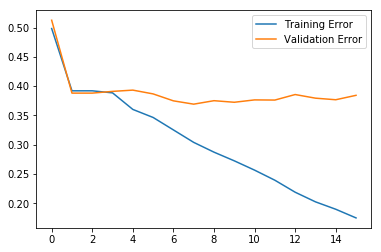

('Best depth:', 7, 'Error:', 0.3691727297224468)
Models with higher maxDepth have a higher complexity
in this problem, we choose depth 7


In [17]:
print("problem 2.3")
print('--------------------------------')
depths = np.arange(16)
Train_error = []
Validation_error = []

for depth in depths:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=depth)
    Train_error.append(learner.err(Xtr,Ytr))
    Validation_error.append(learner.err(Xva,Yva))

plt.plot(depths, Train_error)
plt.plot(depths, Validation_error)
plt.legend(['Training Error','Validation Error'])
plt.show()
bestDepth, bestError = np.argmin(Validation_error), np.min(Validation_error) 
print ('Best depth:', bestDepth, 'Error:', bestError)
print("Models with higher maxDepth have a higher complexity")
print("in this problem, we choose depth 7")

problem 2.4
--------------------------------


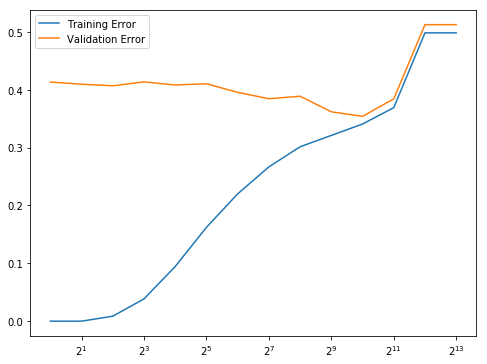

('Best minParent:', 1024, 'Error:', 0.35408245755860956)
Models with higher minParent will have lower complexity


In [30]:
print("problem 2.4")
print('--------------------------------')

Train_error = []
Validation_error = []

for i in range(0,14):
    val = 2**i
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minParent=val)
    Train_error.append(learner.err(Xtr,Ytr))
    Validation_error.append(learner.err(Xva,Yva))
minParents = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]
_, ax = plt.subplots(1, 1, figsize=(8,6))
ax.semilogx(minParents, Train_error,basex=2)
ax.semilogx(minParents, Validation_error,basex=2)
ax.legend(['Training Error','Validation Error'])
plt.show()
bestMinparent, bestError = minParents[np.argmin(Validation_error)], np.min(Validation_error) 
print ('Best minParent:', bestMinparent, 'Error:', bestError)
print("Models with higher minParent will have lower complexity")

problem 2.6
--------------------------------


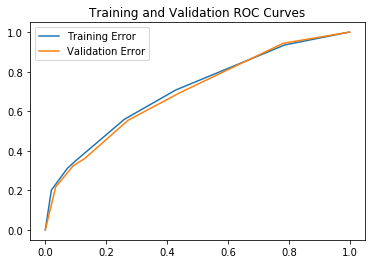

('Training AUC:', 0.71185836212152)
('Validation AUC:', 0.6973118692086943)


In [35]:
print("problem 2.6")
print('--------------------------------')
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=7, minParent=1024)
fprTr, tprTr, _ = learner.roc(Xtr, Ytr)
fprVa, tprVa, _ = learner.roc(Xva, Yva)

plt.plot(fprTr, tprTr)
plt.plot(fprVa, tprVa)
plt.title("Training and Validation ROC Curves")
plt.legend(['Training Error','Validation Error'])
plt.show()
print ('Training AUC:', learner.auc(Xtr, Ytr))
print ('Validation AUC:', learner.auc(Xva, Yva))

In [37]:
print("problem 2.7")
print('--------------------------------')
# according to the question above, we have maxDepth 7, minParent 1024

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=7, minParent=1024)
Xte = np.genfromtxt('/Users/ding/Desktop/CS178/178-hw4-code/data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',')

problem 2.7
--------------------------------


Problem 3: Ensemble Methods

In [48]:
M = Xtr.shape[0]
Mv= Xva.shape[0]
randomForest = [None]*25
YtHat = np.zeros((M,25)) 
YvHat = np.zeros((Mv,25)) 
for i in range(25):
    Xi,Yi = ml.bootstrapData(Xtr,Ytr, M)
    randomForest[i] = ml.dtree.treeClassify()
    randomForest[i].train(Xi,Yi,maxDepth=15,nFeatures=60)
    YtHat[:,i] = randomForest[i].predict(Xtr) 
    YvHat[:,i] = randomForest[i].predict(Xva)
learners = [1,5,10,15]
for i in learners:
    error_Train = (Ytr != (YtHat[:,0:i].mean(axis=1) > .5)).mean()
    error_Validation = (Yva != (YvHat[:,0:i].mean(axis=1) > .5)).mean()
    print("learners: " + str(i))
    print("Train: ", error_Train)
    print("Validation: ", error_Validation)
    print('----------------------------')

learners: 1
('Train: ', 0.2087823275862069)
('Validation: ', 0.41579089194287255)
----------------------------
learners: 5
('Train: ', 0.11153017241379311)
('Validation: ', 0.3831851253031528)
----------------------------
learners: 10
('Train: ', 0.06869612068965517)
('Validation: ', 0.375909458367017)
----------------------------
learners: 15
('Train: ', 0.05307112068965517)
('Validation: ', 0.37159795203449203)
----------------------------


Problem 4: Statement of Collaboration
Before starting homework, I study the disscusion. and also look at piazza